# **Practical assignment 1**

## Part 1: Fast multiplication.

### Problem 1.1

Run this to install everything needed.

In [198]:
!pip install numpy
!pip install matplotlib
!pip install pandas

21942.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


21948.09s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


21953.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)


In [199]:
import matplotlib.pyplot as plt
import random
import time
import numpy as np
import math
import pandas as pd

The following function multiply an n-digit number on 1-digit number just going through the longer one (O(n)) and multiplying it on the second number. (O(1) cause it can be taken from the multiplication table.

In [43]:
def multiplicate_on_one_number(a, b):
    result = ""
    a_length = len(str(a))
    to_remember = 0
    for i in range(a_length-1):
        current = a % 10
        a = a // 10
        current = b*current+to_remember
        current_without_rest = current % 10
        result = str(current_without_rest) + result
        to_remember = current // 10
    result = str(a*b+to_remember) + result
    return int(result)

*Example:*

In [44]:
a = 13425654
b = 2
print(multiplicate_on_one_number(a, b) == a*b)
multiplicate_on_one_number(a, b)

True


26851308

This is already our "grade-school multiplication". It goes through each digit in the second number (O(n)) and multiplies its digits. ($O(n)$) So summary it is $O(n^2)$. And after that sums the result in needed method. (We will have $n$ applications, so $n$ sums of $k$ length number = $O(nk)$) So the resulting complexity is $O(n^2)$

In [45]:
def grade_school_multiplication(a, b):
    result = 0
    b_length = len(str(b))
    for i in range(b_length):
        product_by_one = multiplicate_on_one_number(int(str(b)[-i-1]), a)
        to_add = int(str(product_by_one) + "0"*i)
        result += to_add
    return result

Functions for binary add and substract of two numbers $O(n)$:

In [46]:
def binary_add(a, b):
    max_len = max(len(a), len(b))
    a = a.zfill(max_len)
    b = b.zfill(max_len)
    result = ''
    to_remember = 0
    for i in range(max_len - 1, -1, -1):
        r = to_remember
        r += 1 if a[i] == '1' else 0
        r += 1 if b[i] == '1' else 0
        result = ('1' if r % 2 == 1 else '0') + result
        to_remember = 0 if r < 2 else 1
    if to_remember != 0:
        result = '1' + result
    return result

*Example:*

In [47]:
a = "10101001"
b = "00010011"
binary_add(a, b)

'10111100'

In [48]:
def binary_substract(a, b):
    
    max_len = max(len(a), len(b))
    a = a.zfill(max_len)
    b = b.zfill(max_len)
    result = ''
    to_remember = 0
    flag = False
    for i in range(max_len - 1, -1, -1):
        if to_remember == 1 and a[i] == "1":
            a = a[:i] + "0" + a[i+1:]
        elif to_remember == 1 and a[i] == "0":
            a = a[:i] + "1" + a[i+1:]
            to_remember = 2
        current_res = "0" if a[i] == b[i] else "1"
        result = current_res + result
        if to_remember == 2:
            to_remember = 1
            continue
        to_remember = 1 if (current_res == "1" and a[i] == "0") else 0
    
    return result

*Example:*

In [49]:
binary_substract(a, b)

'10010110'

Karatsuba algorithm for multiplying numbers. Works closely to $O(n^2)$.

It reduces the multiplication of two n-digit numbers to three multiplications of $\frac{n}{2}$ - digit numbers. So using Master Theorem its complexity is $O(n^{\log_{2}3}) ≈ O(n^{1.58})$ 

In [50]:
def karatsuba(x, y):
    '''
    Basic implementation of recursive karatsuba algo
    '''

    #base case
    if x < 10 or y < 10:
        return x*y
    
    else:
        max_len = max(len(str(x)), len(str(y)))
        power = int(math.ceil(max_len / 2))
        
        a = x // 10**power
        b = x % 10**power
        c = y // 10**power
        d = y % 10**power

        ac = karatsuba(a, c)
        bd = karatsuba(b, d)
        ab_cd = karatsuba(a+b,c+d)
        ad_plus_bc = ab_cd - ac - bd


        prod = ac * 10**(power*2) + (ad_plus_bc* 10**power) + bd

        return prod

3. Derive theoretical time complexities\
    a) In grade-school multiplication we have to go through each bit in both numbers. Firslty we multiply each digit in number B on the whole value A. this will be $O(n*m)$. So its time complexity is $O(n^2)$.\
    \
    b) Karatsuba method uses divide and conquire paradigm that reduces the multiplication of two n-digit numbers to three multiplications of n/2-digit numbers. \
    $T(n)=3*T(\frac{n}{2})+O(n).$
    Using Master theorem we can compute time complexity which is equal to $O({n^{\log_{2}3} ≈ n^{1.58}})$

Here you can see graphs which visualise time complexity of the algorithms. (Red line shows us $O(n^2)$). So the straighter the other line is, the closer it is to expected complexity.

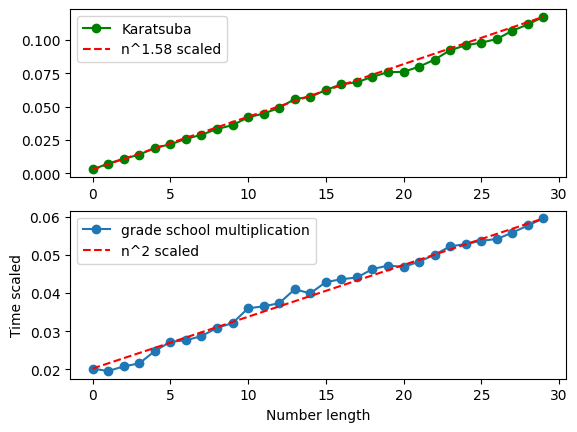

In [51]:
def time_complexity_check():
    lengths = [i for i in range(30)]
    time_grade_school = []
    time_karatsuba = []
    for length in lengths:
        sum_result_grade = 0
        sum_result_karatsuba = 0
        for number_tests in range(500):
            number_a = random.randint(10**length, 10**(length+1)-1)
            number_b = random.randint(10**length, 10**(length+1) - 1)
            begin = time.time()
            grade_school_multiplication(number_a, number_b)
            end = time.time()
            sum_result_grade += (end-begin)
            
            begin = time.time()
            karatsuba(number_a, number_b)
            end = time.time()
            sum_result_karatsuba += (end-begin)
        time_grade_school.append((sum_result_grade / 10)**(1/2))
        time_karatsuba.append((sum_result_karatsuba / 10)**(1/1.58))

    fig, (ax1, ax2) = plt.subplots(2)

    ax1.plot(lengths, time_karatsuba, label = "Karatsuba", marker = "o", color = "g")
    ax1.plot([lengths[0], lengths[-1]], [time_karatsuba[0], time_karatsuba[-1]], '--r', label='n^1.58 scaled')

    ax2.plot(lengths, time_grade_school, label = "grade school multiplication", marker = "o")
    ax2.plot([lengths[0], lengths[-1]], [time_grade_school[0], time_grade_school[-1]], '--r', label='n^2 scaled')

    plt.xlabel("Number length")
    plt.ylabel("Time scaled")

    ax1.legend()
    ax2.legend()

    plt.show()


time_complexity_check()


On the graph below we can see what was the time for the numbers, which length are 50. It looks like it depends very strong. But in fact the time changes only in 0.0003 in grade scchool multiplication. And not more than 0.00004 seconds in Karatsuba method. (It is impossible to show what numbers where used, they're too big, so are shown just like a black line)

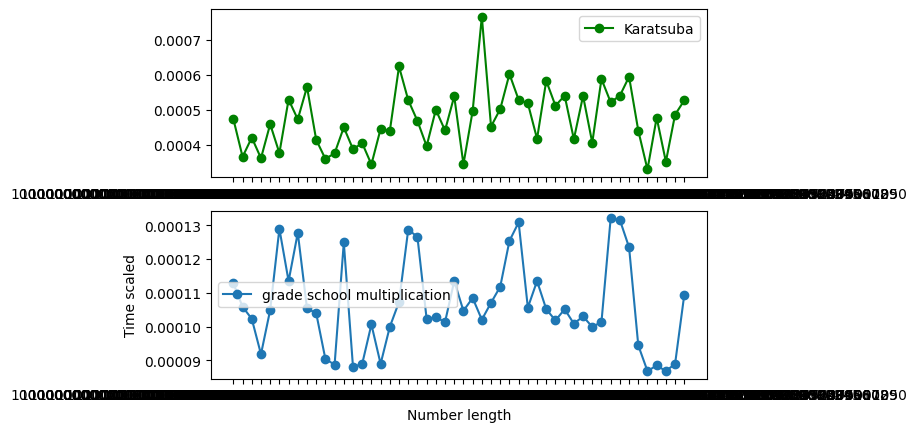

In [178]:
def time_complexity_check():
    length = 50
    lengths = []
    time_grade_school = []
    time_karatsuba = []
    number_a = 1*(10**length)
    number_b = 1*(10**length)
    for i in range(50):
        number_a = number_a + 19327500021
        number_b = number_b + 19327500021
        if len(str(number_a)) > length+1:
            break
        lengths.append((str(number_a)))
        begin = time.time()
        grade_school_multiplication(number_a, number_b)
        end = time.time()
        time_grade_school.append((end-begin))
        
        begin = time.time()
        karatsuba(number_a, number_b)
        end = time.time()
        time_karatsuba.append(((end - begin)))

    fig, (ax1, ax2) = plt.subplots(2)

    ax1.plot(lengths, time_karatsuba, label = "Karatsuba", marker = "o", color = "g")
    # ax1.plot([lengths[0], lengths[-1]], [time_karatsuba[0], time_karatsuba[-1]], '--r', label='n^1.58 scaled')

    ax2.plot(lengths, time_grade_school, label = "grade school multiplication", marker = "o")
    # ax2.plot([lengths[0], lengths[-1]], [time_grade_school[0], time_grade_school[-1]], '--r', label='n^2 scaled')

    plt.xlabel("Number length")
    plt.ylabel("Time scaled")

    ax1.legend()
    ax2.legend()

    plt.show()


time_complexity_check()


### Problem 1.2

In this problem I have to multiply matrix in two ways:\
Trivial method - $O(n^2)$\
Strassen method - $O(n^{\log_{2}7}) ≈ O(n^{1.58})$

The following function align matrix when their size is not $2^i * 2^i$

In [68]:
def matrix_align(m):
    nearest_power = 0
    size_matrix = len(m)
    while size_matrix > 2**nearest_power:
        nearest_power += 1
    matrix_new_size = 2**nearest_power
    for _ in range(matrix_new_size - size_matrix):
        m.append([0 for _ in range(len(m[0]))])
    rows_differ = len(m) - len(m[0])
    if rows_differ > 0:
        for _ in range(rows_differ):
            for j in m:
                j.append(0)
    elif rows_differ < 0:
        for _ in range(-1*rows_differ):
            m.append([0 for _ in range(len(m[0]))])
    

Trivial matrix multiplying algorithm:

In [123]:
def trivial_matrix(m1, m2):
    # matrix_align(m1)
    # matrix_align(m2)
    result = list([[0 for _ in range(len(m2[1]))] for j in range(len(m1))])
    for i in range(len(m1)):
        for j in range(len(m2[0])):
            for k in range(len(m2)):
                result[i][j] += m1[i][k] * m2[k][j]
    return result

Helping functions to add and substract matrix:

In [133]:
def add_matrix(m1, m2):
    final_matrix = [[0 for _ in range(len(m1[0]))] for _ in range(len(m1))]
    for i in range(len(m1)):
        for j in range(len(m1[i])):
            final_matrix[i][j] = m1[i][j] + m2[i][j]
    return final_matrix
def substract_matrix(m1, m2):
    final_matrix = [[0 for _ in range(len(m1[0]))] for _ in range(len(m1))]
    for i in range(len(m1)):
        for j in range(len(m1[i])):
            final_matrix[i][j] = m1[i][j] - m2[i][j]
    return final_matrix
def matrix_clear_extra(m, size):
    new_matrix = []
    for i in range(size[0]):
        new_matrix.append([])
        for j in range(size[1]):
            new_matrix[i].append(m[i][j])
    return new_matrix
def concatenate_matrix(a, b, c, d):
    new_matrix = []
    for i in range(len(a)):
        new_matrix.append(a[i] + b[i])
    for i in range(len(c)):
        new_matrix.append(c[i]+d[i])
    return new_matrix

Strassen alorithm, which is used to multiply matrix. Time complexity for which is $O(n^3)$

In [134]:
def strassen(m1, m2):
    def strassen_recursive(m1, m2):
        matrix_align(m1)
        matrix_align(m2)

        if len(m1) == 2 and len(m2) == 2:
            s1 = m2[0][1] - m2[1][1]
            s2 = m1[0][0] + m1[0][1]
            s3 = m1[1][0] + m1[1][1]
            s4 = m2[1][0] - m2[0][0]
            s5 = m1[0][0] + m1[1][1]
            s6 = m2[0][0] + m2[1][1]
            s7 = m1[0][1] - m1[1][1]
            s8 = m2[1][0] + m2[1][1]
            s9 = m1[0][0] - m1[1][0]
            s10 = m2[0][0] + m2[0][1]

            p1 = m1[0][0] * s1
            p2 = s2 * m2[1][1]
            p3 = s3 * m2[0][0]
            p4 = m1[1][1] * s4
            p5 = s5 * s6
            p6 = s7 * s8
            p7 = s9 * s10

            c00 = p5 + p4 - p2 + p6
            c01 = p1 + p2
            c10 = p3 + p4
            c11 = p5 + p1 - p3 - p7

            return [[c00, c01], [c10, c11]]
        else:
            a1 = m1[0:len(m1)//2]
            a11 = [[0 for _ in range(len(a1[0]) // 2)] for _ in range(len(a1))]
            a12 = [[0 for _ in range(len(a1[0]) // 2)] for _ in range(len(a1))]
            for idx, i in enumerate(a1):
                for j in range(len(i) // 2):
                    a11[idx][j] = i[j]
            for idx, i in enumerate(a1):
                for j in range(len(i) // 2, len(i)):
                    a12[idx][len(i) // 2 - j] = i[j]
            a2 = m1[len(m1)//2:]
            a21 = [[0 for _ in range(len(a2[0]) // 2)] for _ in range(len(a2))]
            a22 = [[0 for _ in range(len(a2[0]) // 2)] for _ in range(len(a2))]
            for idx, i in enumerate(a2):
                for j in range(len(i) // 2):
                    a21[idx][j] = i[j]
            for idx, i in enumerate(a2):
                for j in range(len(i) // 2, len(i)):
                    a22[idx][len(i) // 2 - j] = i[j]

            b1 = m2[0:len(m2) // 2]
            b11 = [[0 for _ in range(len(b1[0]) // 2)] for _ in range(len(b1))]
            b12 = [[0 for _ in range(len(b1[0]) // 2)] for _ in range(len(b1))]
            for idx, i in enumerate(b1):
                for j in range(len(i) // 2):
                    b11[idx][j] = i[j]
            for idx, i in enumerate(b1):
                for j in range(len(i) // 2, len(i)):
                    b12[idx][len(i) // 2 - j] = i[j]

            b2 = m2[len(m2) // 2:]
            b21 = [[0 for _ in range(len(b2[0]) // 2)] for _ in range(len(b2))]
            b22 = [[0 for _ in range(len(b2[0]) // 2)] for _ in range(len(b2))]
            for idx, i in enumerate(b2):
                for j in range(len(i) // 2):
                    b21[idx][j] = i[j]
            for idx, i in enumerate(b2):
                for j in range(len(i) // 2, len(i)):
                    b22[idx][len(i) // 2 - j] = i[j]

            s1 = substract_matrix(b12, b22)
            s2 = add_matrix(a11, a12)
            s3 = add_matrix(a21, a22)
            s4 = substract_matrix(b21, b11)
            s5 = add_matrix(a11, a22)
            s6 = add_matrix(b11, b22)
            s7 = substract_matrix(a12, a22)
            s8 = add_matrix(b21, b22)
            s9 = substract_matrix(a11, a21)
            s10 = add_matrix(b11, b12)

            p1 = strassen_recursive(a11, s1)
            p2 = strassen_recursive(s2, b22)
            p3 = strassen_recursive(s3, b11)
            p4 = strassen_recursive(a22, s4)
            p5 = strassen_recursive(s5, s6)
            p6 = strassen_recursive(s7, s8)
            p7 = strassen_recursive(s9, s10)

            c11 = add_matrix(substract_matrix(add_matrix(p5, p4), p2), p6)
            c12 = add_matrix(p1, p2)
            c21 = add_matrix(p3, p4)
            c22 = substract_matrix(substract_matrix(add_matrix(p5, p1), p3), p7)
            matrix = concatenate_matrix(c11, c12, c21, c22)
            return matrix
    size_n = len(m1)
    size_k = len(m2[0])
    matrix = strassen_recursive(m1, m2)
    matrix = matrix_clear_extra(matrix,(size_n, size_k))
    return matrix

In [135]:
matrix1 = [[0, 10, 68, 80, 76], [90, 24, 15, 19, 74], [81, 24, 76, 31, 75], [70, 92, 36, 81, 62], [52, 59, 61, 73, 74]]
matrix2 = [[61, 22, 12, 4, 75], [26, 22, 84, 42, 15], [76, 41, 61, 87, 81], [0, 34, 57, 36, 28], [62, 92, 29, 13, 55]]
strassen(matrix1, matrix2)

[[10140, 12720, 11752, 10204, 12078],
 [11842, 10577, 7240, 4319, 12927],
 [15991, 13380, 11566, 10035, 17584],
 [13242, 13498, 17179, 10998, 15224],
 [13930, 14233, 15608, 11583, 15840]]

In [128]:
def time_complexity_check(lengths):
    time_trivial = []
    time_strassen = []
    for length in lengths:
            rand_numb1 = length
            rand_numb2 = length

            matrix1 = np.random.rand(length, length).tolist()
            matrix2 = np.random.rand(length, length).tolist()

            begin = time.time()
            trivial_matrix(matrix1, matrix2)
            end = time.time()
            time_trivial.append((end-begin)**(1/3))
            
            begin = time.time()
            strassen(matrix1, matrix2)
            end = time.time()
            time_strassen.append((end-begin)**(1/2.81))

        # time_grade_school.append((sum_result_grade / 10)**(1/2))
        # time_karatsuba.append((sum_result_karatsuba / 10)**(1/1.58))

    fig, (ax1, ax2) = plt.subplots(2)

    ax1.plot(lengths, time_strassen, label = "Strassen", marker = "o", color = "g")
    ax1.plot([lengths[0], lengths[-1]], [time_strassen[0], time_strassen[-1]], '--r', label='n^2.81 scaled')

    ax2.plot(lengths, time_trivial, label = "Trivial multiplication", marker = "o")
    ax2.plot([lengths[0], lengths[-1]], [time_trivial[0], time_trivial[-1]], '--r', label='n^3 scaled')

    plt.xlabel("Number length")
    plt.ylabel("Time scaled")

    ax1.legend()
    ax2.legend()

    plt.show()




Here you can see the graph for matrix which size is only $2^i$. 

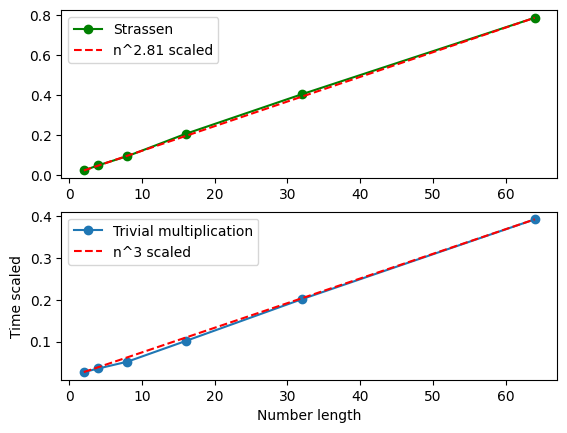

In [144]:
lengths = [2**i for i in range(1, 7)]
time_complexity_check(lengths)

Whereas here we can see all the meanings from $2*2$ to $100*100$. (squared only)\
We can see that Trivial multiplication is going perfectly, whereas in Strassen algorithm we see something like stairs. It is happening because for each matrix Strassen's algorithm should "align" the matrix to size $2^i * 2^i$. So that, for matrix from $2^{i-1} * 2^{i-1}$ to $2^{i} * 2^{i}$ the time which is taken will be approximately the same.

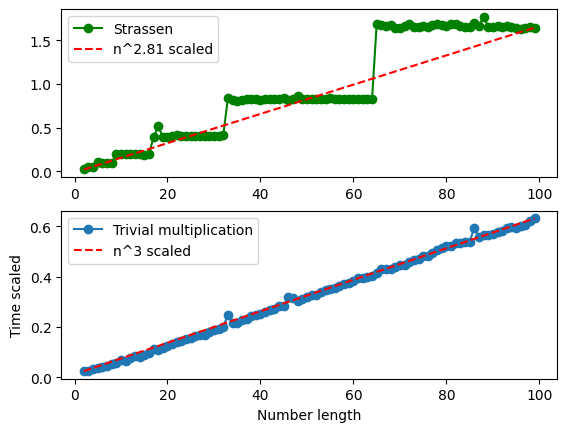

In [130]:
lengths = [i for i in range(2, 100)]
time_complexity_check(lengths)


3. Derive theoretical time complexities:
    a) Trivial matrix multiplication. For this method for each element (they're $n$) to find we need $n^2$ operations. So time complexity for this will be $O(n^3)$.
    b) Strassen algo. In this $T(n)=7T(\frac{n}{2})+O(n^2).$\
    Master theorem $=> O(n^{\log_{2}{7}})$

Below we can see the graph(It is strange, I know) which shows us dependency beetween the max value in the random matrix. (And also there are two determined values. Matrix of all zeroes, and of all 999999999 numbers). Here we can that dependency on values is a bit higher. 

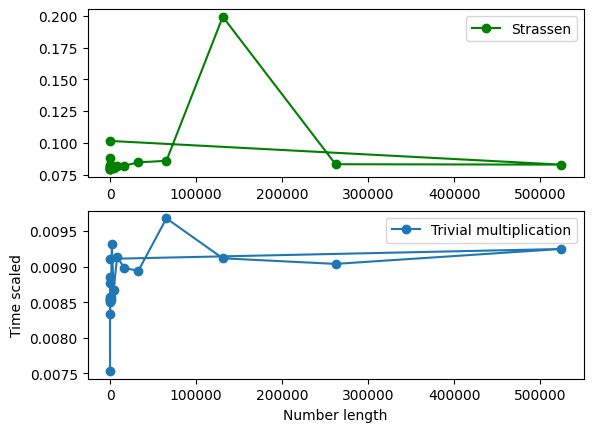

In [197]:
def check_inside_values_time():
    length = 32
    time_trivial = []
    time_strassen = []
    meanings = []
    rand_numb1 = length
    rand_numb2 = length
    for i in range(20):
        matrix1_old = np.random.rand(length, length).tolist()
        matrix2_old = np.random.rand(length, length).tolist()
        matrix1 = []
        matrix2 = []
        for j in range(len(matrix1_old)):
            matrix1.append([])
            matrix2.append([])
            for k in range(len(matrix1_old[i])):
                matrix1[j].append(int(matrix1_old[j][k]*(2**i)))
                matrix2[j].append(int(matrix2_old[j][k]*(2**i)))
                
        max_num = 0
        for j in matrix1:
            if max(j) > max_num:
                max_num = max(j)
        for j in matrix2:
            if max(j) > max_num:
                max_num = max(j)
        meanings.append(max_num)
        begin = time.time()
        trivial_matrix(matrix1, matrix2)
        end = time.time()
        time_trivial.append((end-begin))
        
        begin = time.time()
        strassen(matrix1, matrix2)
        end = time.time()
        time_strassen.append((end-begin))
    matrix_1 = [[0 for _ in range(length)] for _ in range(length)]
    matrix_2 = [[0 for _ in range(length)] for _ in range(length)]
    begin = time.time()
    trivial_matrix(matrix1, matrix2)
    end = time.time()
    time_trivial.append((end-begin))
    meanings.append(0)
    

    matrix1 = [[9999999999 for _ in range(length)] for _ in range(length)]
    matrix2 = [[9999999999 for _ in range(length)] for _ in range(length)]
    # meanings.append(9999999999)
    begin = time.time()
    strassen(matrix1, matrix2)
    end = time.time()
    time_strassen.append((end-begin))
    # meanings.append(0)



        # time_grade_school.append((sum_result_grade / 10)**(1/2))
        # time_karatsuba.append((sum_result_karatsuba / 10)**(1/1.58))

    fig, (ax1, ax2) = plt.subplots(2)

    ax1.plot(meanings, time_strassen, label = "Strassen", marker = "o", color = "g")
    # ax1.plot([lengths[0], lengths[-1]], [time_strassen[0], time_strassen[-1]], '--r', label='n^2.81 scaled')

    ax2.plot(meanings, time_trivial, label = "Trivial multiplication", marker = "o")
    # ax2.plot([lengths[0], lengths[-1]], [time_trivial[0], time_trivial[-1]], '--r', label='n^3 scaled')

    plt.xlabel("Number length")
    plt.ylabel("Time scaled")

    ax1.legend()
    ax2.legend()

    plt.show()

check_inside_values_time()


## PART 2: Randomized algorithms. 

### Problem 2.1


In this task we have to implement some QuickSort algos. (QuickSort determined, QuickSort randomized, and some more functions which uses QuickSelect algo.)

In [234]:
def partition(array, left, right):
	x = array[right]
	i = left
	for j in range(left, right):
		if array[j] <= x:
			array[i], array[j] = array[j], array[i]
			i += 1
	array[i], array[right] = array[right], array[i]
	return i

def partition_with_given_index(array, left, right, index):
	x = array[index]
	i = left
	for j in range(left, right):
		if array[j] <= x:
			array[i], array[j] = array[j], array[i]
			i += 1
	array[i], array[right] = array[right], array[i]
	return i

In [146]:
def randomized_partition(array, left, right):
	random_index = random.randint(left, right)
	array[right], array[random_index] = array[random_index], array[right]
	return partition(array, left, right)

k-th smallest (and min, max):

In [147]:
def kthSmallest(array, left, right, k):
    if (k > 0 and k <= right - left + 1):
        index = partition(array, left, right)
        if (index - left == k - 1):
            return array[index]
        if (index - left > k - 1):
            return kthSmallest(array, left, index - 1, k)
        return kthSmallest(array, index + 1, right, 
                            k - index + left - 1)
    return "Index out of bound"

def kthSmallest_with_given_index(array, left, right, k, index):
    if (k > 0 and k <= right - left + 1):
        index = partition(array, left, right, index)
        if (index - left == k - 1):
            return array[index]
        if (index - left > k - 1):
            return kthSmallest(array, left, index - 1, k)
        return kthSmallest(array, index + 1, right, 
                            k - index + left - 1)
    return "Index out of bound"

In [148]:
def smallest(array, left, right):
	return kthSmallest(array, left, right, 0)

In [149]:
def biggest(array, left, right):
	return kthSmallest(array, left, right, len(array) - 1)
	

In [150]:
def randomized_kthSmallest(array, left, right, k):
    if (k > 0 and k <= right - left + 1):
        index = randomized_partition(array, left, right)
        if (index - left == k - 1):
            return array[index]
        if (index - left > k - 1):
            return randomized_kthSmallest(array, left, index - 1, k)
        return randomized_kthSmallest(array, index + 1, right, 
                            k - index + left - 1)
    return "Index out of bound"


In [151]:
def median(array, left, right):
    if len(array)%2 == 0:
        first = kthSmallest(array, left, right, len(array)//2)
        second = array[len(array)//2]
        return (first + second) / 2
        
    return kthSmallest(array, left, right, len(array)//2 + 1)

In [152]:
def randomized_median(array, left, right):
    if len(array)%2 == 0:
        first = randomized_kthSmallest(array, left, right, len(array)//2)
        second = array[len(array)//2]
        return (first + second) / 2
        
    return randomized_kthSmallest(array, left, right, len(array)//2 + 1)

3.a The best case $O(n)$ - will be when the algorithm chooses the k-th smallest element on the first iteration. As a result, the algorithm does $O(n)$ during 1st and last step, after that it returns pivot and this is the end.\
\
The worst case $(O(n^2))$ - will be when our array is sorted (or reversed sorted). Then our pivot is chosen as last element, so then ```partition``` will divide it to two subarrays which are $n$ and $n-1$.\
$T_n = O(n) + T_{n-1} = O(n) + O(n-1) + ... + O(1) = O(\frac{n(n-1)}{2}) = O(n^2)$

3.b **Expected number of comparisons to find max and min value: $E(X) = E(\sum_{i=0}^{n-1} X_i = n)$\
To find a median in average case we need at most $4n$ comparisons.\
$c_{n,k} and E[Q(k)]$ expected number of comparisons (parameter $k$), and the probability to choose the pivot $P = p = {\frac{1}{n}}$, so: \

$c_{n, k}$ = $E[Q(k)]$ = $n$ - 1 + $([\sum_{p=1}^{k-1}E[Q_{right}(k-p)|P=p]$ + $[\sum_{p=k-1}^{n-1}E[Q_{left}(k)|P=p])⋅P(P=p)$ =

 $n$ - 1 + $\frac{1}{n}$ $⋅(\sum_{p=1}^{k-1}c_{n-p, k-p} + \sum_{p=k-1}^{n-1}c_{p, k})$ $\le$ $n$ - 1 + $\frac{1}{n}$ $⋅(\sum_{p=1}^{k-1}4⋅(n-p) + \sum_{p=k-1}^{n-1}4\cdot p)$ =
 
  $n - 1 + \frac{4}{n} ⋅ (n \cdot (n-1) - \frac{(n-k)(n-k+1)}{2} - \frac{k \cdot (k+1)}{2}) \le n - 1 + \frac{4}{n} \cdot (n \cdot (n-1) - \frac{n^2}{4})$ =
  
   $n - 1 + 4 \cdot (n-1) - n \le 4 \cdot n$

In [214]:
def check_for_different_values():
        sorted_array = [i for i in range(100)]
        reversed_sorted_array = [100 - i for i in range(100)]
        random_array = [random.randint(0, 100) for _ in range(100)]
        sorted_array_time = []
        reversed_sorted_array_time = []
        random_array_time = []
        lst1 = [sorted_array, reversed_sorted_array, random_array]
        lst = [sorted_array_time, reversed_sorted_array_time, random_array_time]
        for i in range(3):
                begin = time.time()
                kthSmallest(lst1[i], 0, len(lst1[i]) - 1, 3)
                end = time.time()
                lst[i].append(end-begin)

                begin = time.time()
                randomized_kthSmallest(lst1[i], 0, len(lst1[i]) - 1, 3)
                end = time.time()
                lst[i].append(end-begin)

                begin = time.time()
                median(lst1[i], 0, len(lst1[i]) - 1)
                end = time.time()
                lst[i].append(end - begin)

                begin = time.time()
                randomized_median(lst1[i], 0, len(lst1[i]) - 1)
                end = time.time()
                lst[i].append(end-begin)
        

        df=pd.DataFrame({"Sorted array":lst[0],
                        "Reversed sorted array":lst[1], "Random array": lst[2]})

        df.index = ["k-th Smallest", "Randomized k-th Smallest", "Median", "Randomized media"]
        return df


check_for_different_values()

,Sorted array,Reversed sorted array,Random array
k-th Smallest,0.000744,0.000027,0.000009
Randomized k-th Smallest,0.000019,0.000026,0.000019
Median,0.000334,0.000264,0.000020
Randomized media,0.000028,0.000019,0.000037


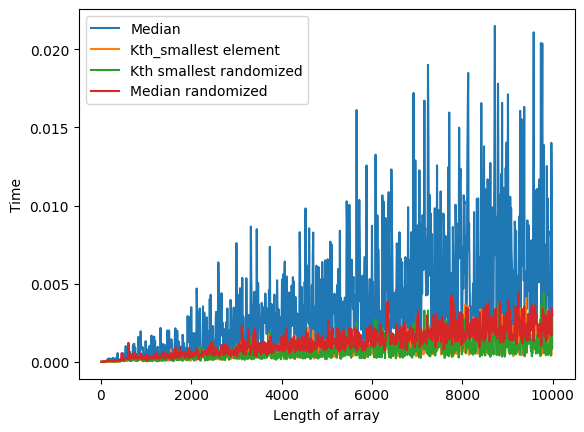

In [243]:
def plots():
    length_random = []
    time_kth = []
    time_kth_r = []
    time_med = []
    time_med_r = []
    for i in range(1, 1000):
        random_array = [random.randint(0, i**10) for _ in range(i*10)]
        sorted_array = [i for i in range(i*10)]
        len_arr = len(random_array)
        length_random.append(len_arr)
        # for j in range(10)
        begin = time.time()
        kthSmallest(random_array, 0, len_arr - 1, 3)
        end = time.time()
        time_kth.append(end-begin)

        begin = time.time()
        randomized_kthSmallest(random_array, 0, len_arr - 1, 3)
        end = time.time()
        time_kth_r.append(end-begin)

        begin = time.time()
        median(random_array, 0, len_arr - 1)
        end = time.time()
        time_med.append(end-begin)

        begin = time.time()
        randomized_median(random_array, 0, len_arr - 1)
        end = time.time()
        time_med_r.append(end-begin)

    # fig, (ax1, ax2, ax3,) = plt.subplots(2)
    plt.plot(length_random, time_med, label = "Median")
    plt.plot(length_random, time_kth, label="Kth_smallest element")
    plt.plot(length_random, time_kth_r, label = "Kth smallest randomized")
    plt.plot(length_random, time_med_r, label = "Median randomized")
    plt.xlabel("Length of array")
    plt.ylabel("Time")
    plt.legend()
    plt.show()
plots()


Here you can see two functions of min, max more detailed. Above we use it as subcase of kth smallest
```
def smallest(array, left, right):
	index = partition(array, left, right)
	if (index - left == 0):
		return array[index]
	if (index - left > 0):
		return smallest(array, left, index - 1)
	return smallest(array, index + 1, right)
	
    
def biggest(array, left, right):

	index = partition(array, left, right)
	if (index - left == right-left):
			return array[index]
	if (index - left > right-left):
		return biggest(array, left, index - 1)
	return biggest(array, index + 1, right)
```

### 2.2 Quicksort

Now let's move on to the QuickSort algo. 
(For better readability, I copied some functions also here. For example partition.)

In [244]:
def partition(array, left, right):
	x = array[right]
	i = left
	for j in range(left, right):
		if array[j] <= x:
			array[i], array[j] = array[j], array[i]
			i += 1
	array[i], array[right] = array[right], array[i]
	return i

In [245]:
def kthSmallest_index_find(array, left, right, k):
    """
    Function which finds the index of k_th smallest element.
    """
    if (k > 0 and k <= right - left + 1):
        index = partition(array, left, right)
        if (index - left == k - 1):
            return index
        if (index - left > k - 1):
            return kthSmallest_index_find(array, left, index - 1, k)
        return kthSmallest_index_find(array, index + 1, right, 
                            k - index + left - 1)
    return "Index out of bound"

In [246]:
def randomized_kthSmallest_index_find(array, left, right, k):
    if (k > 0 and k <= right - left + 1):
        index = randomized_partition(array, left, right)
        if (index - left == k - 1):
            return index
        if (index - left > k - 1):
            return randomized_kthSmallest(array, left, index - 1, k)
        return randomized_kthSmallest(array, index + 1, right, 
                            k - index + left - 1)
    return "Index out of bound"
# a = [10000 - i for i in range(10000)]


In [158]:
def median_index_find(array, left, right):
    return kthSmallest_index_find(array, left, right, len(array)//2 + 1)

In [159]:
def randomized_median_index_find(array, left, right):
    return randomized_kthSmallest_index_find(array, left, right, len(array)//2 + 1)

In [247]:
def quickSort(array, left, right):
    """Fixed position in the array (e.g. first element or middle)"""
    if left < right:
        index = partition(array, left, right)
        quickSort(array, left, index - 1)
        quickSort(array, index + 1, right)

In [161]:
def quickSort_determ_med(array, left, right):
	"""
	Deterministic median of the array.
	"""
	median_index = median_index_find(array, left, right)
    # Swapping the starting element of
    # the array and the pivot
	array[right], array[median_index] = array[median_index], array[right]
	quickSort(array, left, right)

In [162]:
def quickSort_random_med(array, left, right):
	median_index = median_index_find(array, left, right)
	array[right], array[median_index] = array[median_index], array[right]
	quickSort(array, left, right)

In [163]:
def randomized_quickSort(array, left, right):
    if left < right:
        index = randomized_partition(array, left, right)
        randomized_quickSort(array, left, index - 1)
        randomized_quickSort(array, index + 1, right)

3) Derive the time complexity:
a)  Worst - The same as in quickSelect the worst case will be $O(n^2)$ as we always divide it to $n$ and $n - 1$.
    Best - Quicksort's best case occurs when the partitions are as evenly balanced as possible: their sizes either are equal or are within 1 of each other. The former case occurs if the subarray has an odd number of elements and the pivot is right in the middle after partitioning, and each partition has $\frac{(n-1)}{2}$ elements. The latter case occurs if the subarray has an even number $n$ of elements and one partition has $\frac{n}{2}$ elements with the other having $\frac{n}{2} - 1$. In either of these cases, each partition has at most $\frac{n}{2}$ and the tree of subproblem sizes looks a lot like the tree of subproblem sizes for merge sort, with the partitioning times looking like the merging times. So in best case partition + union = $O(nlog(n))$\
b)\
c)\
d)$X = \sum_{i=1}^{n} \sum_{j=i+1}^{n}X_{ij}$ <br />

$E[X] = \sum_{i=1}^{n} \sum_{j=i+1}^{n}E[X_{ij}]$

$E[X] = \sum_{i=1}^{n} 2 \cdot (\frac{1}{2} + \frac{1}{3} + \frac{1}{4} + \frac{1}{5} + ... + \frac{1}{n - i + 1})$ <br />
The sequence $\frac{1}{2} + \frac{1}{3} + \frac{1}{4} + \frac{1}{5} + ... + \frac{1}{n}$ is called harmonic and it belongs to the range $[\ln(n), \ln(n)+1]$, so <br />

$E[X] \le 2 \cdot n \cdot ln(n)$\
\

e)Now let's assume that the hypothesis is correct for all $i \le k - 1$ and prove that it is also correct for all $i = k$.
$T(k) = k - 1 + \frac{2}{k} \sum_{i=1}^{k-1}T(i) \le k - 1 + \frac{2}{k} \sum_{i=1}^{k-1}2 \cdot i \cdot ln(i) \le k - 1 + \frac{2}{k} \int_{1}^{k}(2 \cdot x \cdot ln(x))dx = k - 1 + \frac{2}{k} [k^2 \cdot \ln(k) - \frac{k^2}{2} + \frac{1}{2}] = 2 \cdot k \cdot ln(k) - 1 + \frac{1}{k} \le 2 \cdot k \cdot ln(k)$
<br />
Hence, the hypothesis is true for all i and $T(n) \le 2 \cdot n \cdot ln(n)$




In [248]:
def check_for_different_values():
        sorted_array = [i for i in range(100)]
        reversed_sorted_array = [100 - i for i in range(100)]
        random_array = [random.randint(0, 100) for _ in range(100)]
        sorted_array_time = []
        reversed_sorted_array_time = []
        random_array_time = []
        lst1 = [sorted_array, reversed_sorted_array, random_array]
        lst = [sorted_array_time, reversed_sorted_array_time, random_array_time]
        for i in range(3):
                begin = time.time()
                quickSort(lst1[i], 0, len(lst1[i]) - 1)
                end = time.time()
                lst[i].append(end-begin)

                begin = time.time()
                quickSort_determ_med(lst1[i], 0, len(lst1[i]) - 1)
                end = time.time()
                lst[i].append(end-begin)

                begin = time.time()
                quickSort_random_med(lst1[i], 0, len(lst1[i]) - 1)
                end = time.time()
                lst[i].append(end - begin)

                begin = time.time()
                randomized_quickSort(lst1[i], 0, len(lst1[i]) - 1)
                end = time.time()
                lst[i].append(end-begin)
        

        df=pd.DataFrame({"Sorted array":lst[0],
                        "Reversed sorted array":lst[1], "Random array": lst[2]})

        df.index = ["quicksort", "quicksort determ. med.", "quicksort random med.", "Randomized quicksort"]
        return df


check_for_different_values()

,Sorted array,Reversed sorted array,Random array
quicksort,0.000679,0.000369,0.000113
quicksort determ. med.,0.000647,0.000670,0.000581
quicksort random med.,0.000611,0.000586,0.001129
Randomized quicksort,0.000207,0.000183,0.000201


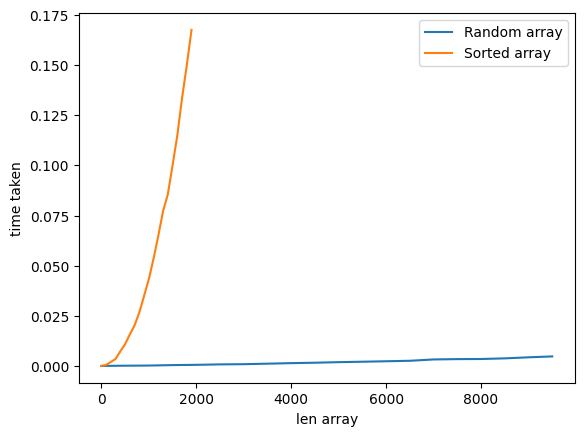

In [264]:
def plot_quicksort():
    time_quicksort_sorted = []
    lengths_sorted = []
    time_quicksort_random = []
    lengths_random = []
    for i in range( 20):
        sorted_array = [i for i in range( i*100)]
        random_array = [random.randint((i-1)*100, i*100) for _ in range(i*500)]
        lengths_sorted.append(len(sorted_array))
        lengths_random.append(len(random_array))
        begin = time.time()
        quickSort(sorted_array, 0, len(sorted_array)-1)
        end = time.time()
        time_quicksort_sorted.append(end - begin)
        begin = time.time()
        quickSort(random_array, 0 , len(sorted_array)-1)
        end = time.time()
        time_quicksort_random.append(end - begin)

    plt.plot(lengths_random, time_quicksort_random, label="Random array")
    plt.plot(lengths_sorted, time_quicksort_sorted, label = "Sorted array")
    plt.legend()
    plt.xlabel("len array")
    plt.ylabel("time taken")
    plt.show()
plot_quicksort()

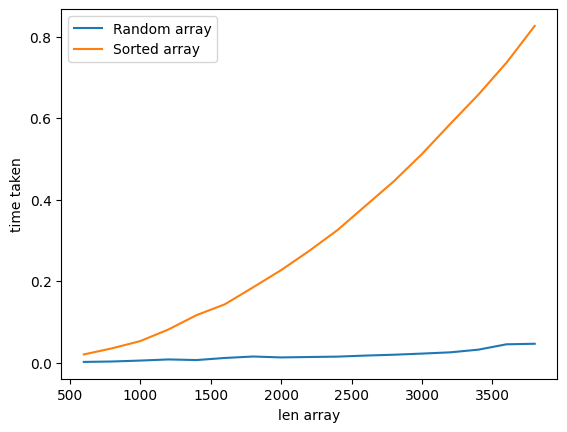

In [273]:
def plot_quicksort():
    time_quicksort_sorted = []
    lengths_sorted = []
    time_quicksort_random = []
    lengths_random = []
    for i in range(3, 20):
        sorted_array = [i for i in range( i*200)]
        random_array = [random.randint((i-1)*100, i*100) for _ in range(i*200)]
        lengths_sorted.append(len(sorted_array))
        lengths_random.append(len(random_array))
        begin = time.time()
        quickSort_determ_med(sorted_array, 0, len(sorted_array)-1)
        end = time.time()
        time_quicksort_sorted.append(end - begin)
        begin = time.time()
        quickSort_determ_med(random_array, 0 , len(random_array)-1)
        end = time.time()
        time_quicksort_random.append(end - begin)

    plt.plot(lengths_random, time_quicksort_random, label="Random array")
    plt.plot(lengths_sorted, time_quicksort_sorted, label = "Sorted array")
    plt.legend()
    plt.xlabel("len array")
    plt.ylabel("time taken")
    plt.show()
plot_quicksort()

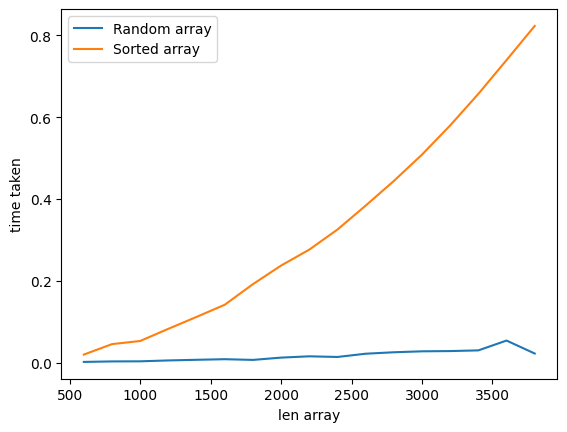

In [274]:
def plot_quicksort():
    time_quicksort_sorted = []
    lengths_sorted = []
    time_quicksort_random = []
    lengths_random = []
    for i in range(3, 20):
        sorted_array = [i for i in range( i*200)]
        random_array = [random.randint((i-1)*100, i*100) for _ in range(i*200)]
        lengths_sorted.append(len(sorted_array))
        lengths_random.append(len(random_array))
        begin = time.time()
        quickSort_random_med(sorted_array, 0, len(sorted_array)-1)
        end = time.time()
        time_quicksort_sorted.append(end - begin)
        begin = time.time()
        quickSort_random_med(random_array, 0 , len(random_array)-1)
        end = time.time()
        time_quicksort_random.append(end - begin)

    plt.plot(lengths_random, time_quicksort_random, label="Random array")
    plt.plot(lengths_sorted, time_quicksort_sorted, label = "Sorted array")
    plt.legend()
    plt.xlabel("len array")
    plt.ylabel("time taken")
    plt.show()
plot_quicksort()

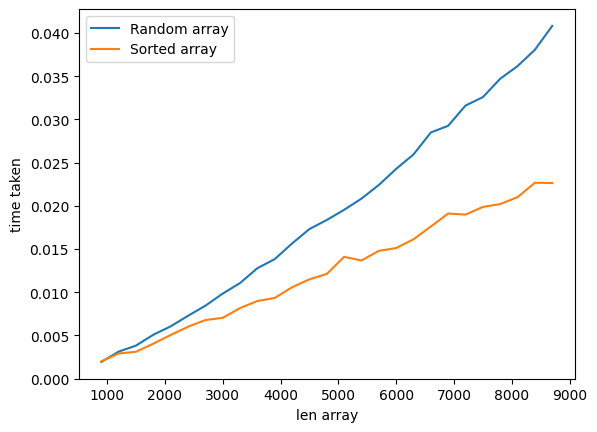

In [284]:
def plot_quicksort():
    time_quicksort_sorted = []
    lengths_sorted = []
    time_quicksort_random = []
    lengths_random = []
    for i in range(3, 30):
        sorted_array = [i for i in range( i*300)]
        random_array = [random.randint((i-1)*300, i*300) for _ in range(i*300)]
        lengths_sorted.append(len(sorted_array))
        lengths_random.append(len(random_array))
        begin = time.time()
        randomized_quickSort(sorted_array, 0, len(sorted_array)-1)
        end = time.time()
        time_quicksort_sorted.append(end - begin)
        begin = time.time()
        randomized_quickSort(random_array, 0 , len(random_array)-1)
        end = time.time()
        time_quicksort_random.append(end - begin)

    plt.plot(lengths_random, time_quicksort_random, label="Random array")
    plt.plot(lengths_sorted, time_quicksort_sorted, label = "Sorted array")
    plt.legend()
    plt.xlabel("len array")
    plt.ylabel("time taken")
    plt.show()
plot_quicksort()